In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 7.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir o tema personalizado
sns.set_theme(        
    palette="dark",              
    font='sans-serif', 
    font_scale=1.3,
    rc={"axes.spines.right": False,  
        "axes.spines.top": False,    
        "figure.figsize": (10, 6),   
        "axes.facecolor": "#ede9e5",
        "figure.facecolor": "#ede9e5"
    }
)

# Aumentar a resolução das figuras
%config InlineBackend.figure_format = 'retina'

In [4]:
km_103_2023 = pd.read_csv("https://drive.google.com/uc?export=download&id=1JSOWPj_ez6I6zCxY7n0inTzuFmglj9Nt", delimiter=';', skiprows=2)
km_103_2017 = pd.read_csv("https://drive.google.com/uc?export=download&id=1Y6qgoX9OXN3MI2SNoxVdoWkBgF98Ynaa", delimiter=';', skiprows=2)

km_144_2023 = pd.read_csv("https://drive.google.com/uc?export=download&id=1uylIY6Hk1h-R6YinvqqtgXDTf3VU7CQ_", delimiter=';', skiprows=2)
km_144_2022 = pd.read_csv("https://drive.google.com/uc?export=download&id=1Bs6Xl0JWnx7gjK9Gbdr4gs9MqdQUOgiB", delimiter=';', skiprows=2)

km_154_2017 = pd.read_csv("https://drive.google.com/uc?export=download&id=1Hy0YOgvFGLHX3i17VUBhFeiin6HTbKtd", delimiter=';', skiprows=2)
km_154_2016 = pd.read_csv("https://drive.google.com/uc?export=download&id=10s_Ta3MY_9ZLWo_ovKGJCJk8PGVb9NgX", delimiter=';', skiprows=2)

km_273_2019 = pd.read_csv("https://drive.google.com/uc?export=download&id=16uhgTGOzhFu83LU7YVffWhqMNaDIvmVM", delimiter=';', skiprows=2)
km_273_2018 = pd.read_csv("https://drive.google.com/uc?export=download&id=1IfGoBCjd0q35musS1JK3XGtj-h84M3cw", delimiter=';', skiprows=2)
km_273_2017 = pd.read_csv("https://drive.google.com/uc?export=download&id=1T8DVMbxqIBpi4FaKDwq5zxSLdNy7-MsT", delimiter=';', skiprows=2)

km_281_2023 = pd.read_csv("https://drive.google.com/uc?export=download&id=1S1ks-j47QjDJGatfqqOA1iD6xZP63yrp", delimiter=';', skiprows=2)
km_281_2022 = pd.read_csv("https://drive.google.com/uc?export=download&id=1LwzDYZL8ug3Mlk0NzBq3CA3JrZkRM05a", delimiter=';', skiprows=2)
km_281_2021 = pd.read_csv("https://drive.google.com/uc?export=download&id=1WdwPEeOS6ZqKEgANNDXE6c28Mr73Wk4u", delimiter=';', skiprows=2)

In [5]:
km_103_2017_2023 = pd.concat([km_103_2017, km_103_2023], axis=0)
km_144_2022_2023 = pd.concat([km_144_2023, km_144_2022], axis=0)
km_154_2016_2017 = pd.concat([km_154_2017, km_154_2016], axis=0)
km_273_2017_2019 = pd.concat([km_273_2019, km_273_2019, km_273_2019], axis=0)
km_281_2021_2023 = pd.concat([km_281_2023, km_281_2022, km_281_2021], axis=0)

In [11]:
def normalizar_datas(df, km):
    df['Hora'] = df['Hora'].astype(str).str.zfill(4)
    df['datetime'] = pd.to_datetime(df['Data'] + ' ' + df['Hora'], format='%d/%m/%Y %M%H')
    df['dia_semana'] = df['datetime'].dt.dayofweek
    df['mes'] = df['datetime'].dt.month
    df['Hora'] = df['datetime'].dt.hour
    df['km'] = km

In [12]:
kms = {103: km_103_2017_2023,
      144: km_144_2022_2023,
      154: km_154_2016_2017,
      273: km_273_2017_2019,
      281: km_281_2021_2023}

for km, df in kms.items():
    df = normalizar_datas(df, km)

In [13]:
pnct = pd.concat(kms.values(), axis=0)

In [14]:
pnct

,Data,Hora,Sentido,(A) Onibus/Cam de 2 eixos,(B) Onibus/Cam de 3 eixos,(C) Caminhao de 4 eixos,(D) Caminhao de 5 eixos,(E) Caminhao de 6 eixos,(F) Caminhao de 7 eixos,(G) Caminhao de 8 eixos,(H) Caminhao de 9 eixos,(I) Passeio,(J) Motocicleta,(L) Indefinido,datetime,dia_semana,mes,km
0,01/02/2017,0,C,22,34,7,5,12,0,0,0,142,29,3,2017-02-01 00:00:00,2,2,103
1,01/02/2017,0,D,18,18,13,4,8,0,0,0,114,8,25,2017-02-01 00:00:00,2,2,103
2,01/02/2017,1,C,7,24,14,6,6,0,0,0,100,14,1,2017-02-01 01:00:00,2,2,103
3,01/02/2017,1,D,10,14,15,10,9,2,0,0,72,5,23,2017-02-01 01:00:00,2,2,103
4,01/02/2017,2,C,19,31,12,10,6,0,0,0,81,18,2,2017-02-01 02:00:00,2,2,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,31/12/2021,21,D,4,1,1,3,4,0,0,4,729,29,3,2021-12-31 21:00:00,4,12,281
5708,31/12/2021,22,C,4,7,2,0,4,0,0,2,366,9,1,2021-12-31 22:00:00,4,12,281
5709,31/12/2021,22,D,3,5,4,0,1,0,0,1,528,13,0,2021-12-31 22:00:00,4,12,281
5710,31/12/2021,23,C,8,7,1,4,3,0,0,0,319,17,0,2021-12-31 23:00:00,4,12,281


In [32]:
# Definir intervalo de km e criar intervalos de km = 1
kms = np.round(np.arange(100, 240, 0.1), 1)

# Definir o intervalo de tempo
horas = pd.date_range(start="2017-01-01", end="2024-12-31 23:00", freq="h")

sentido = pnct['Sentido'].unique()

# Criar combinações de rodovia, intervalo de km e hora
df_completo = pd.MultiIndex.from_product([horas,  kms, sentido], names=['datetime', 'km', 'Sentido']).to_frame(index=False)
df_completo['dia_semana'] = df_completo['datetime'].dt.dayofweek
df_completo['mes'] = df_completo['datetime'].dt.month
df_completo['Hora'] = df_completo['datetime'].dt.hour 
df_completo

,datetime,km,Sentido,dia_semana,mes,Hora
0,2017-01-01 00:00:00,100.0,C,6,1,0
1,2017-01-01 00:00:00,100.0,D,6,1,0
2,2017-01-01 00:00:00,100.1,C,6,1,0
3,2017-01-01 00:00:00,100.1,D,6,1,0
4,2017-01-01 00:00:00,100.2,C,6,1,0
...,...,...,...,...,...,...
196358395,2024-12-31 23:00:00,239.7,D,1,12,23
196358396,2024-12-31 23:00:00,239.8,C,1,12,23
196358397,2024-12-31 23:00:00,239.8,D,1,12,23
196358398,2024-12-31 23:00:00,239.9,C,1,12,23


In [36]:
col_trafego = pnct.columns[3:13]
medias = pnct.groupby(['Sentido', 'mes', 'dia_semana', 'Hora'])[col_trafego].mean().reset_index()
medias

,Sentido,mes,dia_semana,Hora,(A) Onibus/Cam de 2 eixos,(B) Onibus/Cam de 3 eixos,(C) Caminhao de 4 eixos,(D) Caminhao de 5 eixos,(E) Caminhao de 6 eixos,(F) Caminhao de 7 eixos,(G) Caminhao de 8 eixos,(H) Caminhao de 9 eixos,(I) Passeio,(J) Motocicleta
0,C,1,0,0,13.838710,18.000000,15.580645,9.161290,10.806452,1.516129,0.032258,1.806452,348.161290,13.354839
1,C,1,0,1,11.129032,16.483871,13.483871,6.709677,9.193548,1.258065,0.032258,1.129032,199.193548,8.225806
2,C,1,0,2,9.838710,11.516129,11.290323,6.129032,9.096774,1.677419,0.000000,1.451613,122.774194,4.774194
3,C,1,0,3,15.032258,12.967742,13.645161,6.612903,8.516129,1.451613,0.064516,1.451613,111.387097,2.677419
4,C,1,0,4,28.741935,22.419355,15.774194,8.129032,10.903226,2.258065,0.032258,2.612903,181.064516,5.741935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,D,12,6,19,24.979592,39.877551,21.795918,14.591837,34.938776,4.020408,0.102041,4.183673,1259.204082,36.530612
4028,D,12,6,20,20.653061,39.612245,23.469388,15.795918,40.714286,4.040816,0.183673,3.897959,1104.061224,28.224490
4029,D,12,6,21,19.204082,42.040816,23.326531,14.530612,37.612245,4.857143,0.163265,3.367347,925.387755,23.020408
4030,D,12,6,22,16.510204,31.857143,20.387755,12.183673,33.612245,3.714286,0.142857,2.469388,718.510204,21.122449


In [37]:
df_completo = df_completo.merge(medias, on=['Sentido', 'mes', 'dia_semana', 'Hora'], how='left')
df_completo

,datetime,km,Sentido,dia_semana,mes,Hora,(A) Onibus/Cam de 2 eixos,(B) Onibus/Cam de 3 eixos,(C) Caminhao de 4 eixos,(D) Caminhao de 5 eixos,(E) Caminhao de 6 eixos,(F) Caminhao de 7 eixos,(G) Caminhao de 8 eixos,(H) Caminhao de 9 eixos,(I) Passeio,(J) Motocicleta
0,2017-01-01 00:00:00,100.0,C,6,1,0,8.419355,11.129032,9.451613,5.032258,9.677419,1.258065,0.064516,1.483871,430.580645,20.225806
1,2017-01-01 00:00:00,100.0,D,6,1,0,7.129032,16.548387,10.322581,7.677419,15.322581,1.838710,0.032258,2.032258,408.741935,15.709677
2,2017-01-01 00:00:00,100.1,C,6,1,0,8.419355,11.129032,9.451613,5.032258,9.677419,1.258065,0.064516,1.483871,430.580645,20.225806
3,2017-01-01 00:00:00,100.1,D,6,1,0,7.129032,16.548387,10.322581,7.677419,15.322581,1.838710,0.032258,2.032258,408.741935,15.709677
4,2017-01-01 00:00:00,100.2,C,6,1,0,8.419355,11.129032,9.451613,5.032258,9.677419,1.258065,0.064516,1.483871,430.580645,20.225806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196358395,2024-12-31 23:00:00,239.7,D,1,12,23,24.555556,43.000000,36.177778,25.444444,43.155556,7.466667,0.177778,5.088889,297.288889,14.533333
196358396,2024-12-31 23:00:00,239.8,C,1,12,23,31.244444,37.955556,36.933333,18.377778,27.311111,6.155556,0.244444,4.600000,366.333333,17.533333
196358397,2024-12-31 23:00:00,239.8,D,1,12,23,24.555556,43.000000,36.177778,25.444444,43.155556,7.466667,0.177778,5.088889,297.288889,14.533333
196358398,2024-12-31 23:00:00,239.9,C,1,12,23,31.244444,37.955556,36.933333,18.377778,27.311111,6.155556,0.244444,4.600000,366.333333,17.533333


In [38]:
v2017 = pd.read_excel("https://drive.google.com/uc?export=download&id=1A4WxVjhEugOcBpEVcQzvrzNCjn_EWNJZ", sheet_name=1, skiprows=1)
v2018 = pd.read_excel("https://drive.google.com/uc?export=download&id=1MUddhHZ_luI1mVxBZ5pIkwHgVfv7BLmF", sheet_name=1, skiprows=0)
v2019 = pd.read_excel("https://drive.google.com/uc?export=download&id=1yUto7sD2mj6s6aTQpTmJGHevJ5Isqys3", sheet_name=1, skiprows=0)
v2020 = pd.read_excel("https://drive.google.com/uc?export=download&id=1UocbAVqhsyflPOe39U4V11Kk1v8VgGLB", sheet_name=1, skiprows=0)
v2021 = pd.read_excel("https://drive.google.com/uc?export=download&id=1dWGJFM-ZyVpFLqypt8ISeztSazSJc3RT", sheet_name=0, skiprows=0)
v2022 = pd.read_excel("https://drive.google.com/uc?export=download&id=18FODeOoyeAmyoZLB7slt_6nLngH0yXJJ", sheet_name=1, skiprows=0)
v2023 = pd.read_excel("https://drive.google.com/uc?export=download&id=126QySFpWijQgQ1AT0bGM08A9RYWV4zfG", sheet_name=1, skiprows=0)

/usr/local/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/usr/local/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/usr/local/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [39]:
def padronizar_colunas(df, nome_uf, nome_br, nome_km_i, nome_km_f, ano):
    df = df.rename(columns={nome_uf: 'UF',
                      nome_br: 'BR',
                      nome_km_i: 'Km_I',
                      nome_km_f: 'Km_F'})

    colunas_corretas = ['A_C', 'B_C', 'C_C', 'D_C', 'E_C', 'F_C', 'G_C',
       'H_C', 'I_C', 'J_C', 'A_D', 'B_D', 'C_D', 'D_D', 'E_D', 'F_D', 'G_D',
       'H_D', 'I_D', 'J_D']
    


    if ano == 2021:
        for col in df.columns:
                if '_AB' in col:
                    df[col] = col.replace('_AB', '_C')
                elif '_BA' in col:
                    df[col] = col.replace('_BA', '_D')
    elif ano == 2017:
        colunas_erradas = ['VMDa_A', 'VMDa_B', 'VMDa_C', 'VMDa_D', 'VMDa_E', 'VMDa_F',
       'VMDa_G', 'VMDa_H', 'VMDa_I', 'VMDa_J', 'VMDa_A.1', 'VMDa_B.1',
       'VMDa_C.1', 'VMDa_D.1', 'VMDa_E.1', 'VMDa_F.1', 'VMDa_G.1', 'VMDa_H.1',
       'VMDa_I.1', 'VMDa_J.1']
        mapeamento = dict(zip(colunas_erradas, colunas_corretas))
        df = df.rename(columns=mapeamento)

    df = df[(df['UF'] == 'SC') & (df['BR']== 101)]
    df['Ano'] = ano

    return df[['Km_I', 'Km_F','A_C', 'B_C', 'C_C', 'D_C', 'E_C', 'F_C', 'G_C',
       'H_C', 'I_C', 'J_C', 'A_D', 'B_D', 'C_D', 'D_D', 'E_D', 'F_D', 'G_D',
       'H_D', 'I_D', 'J_D', 'Ano']]


In [40]:
v2017 = padronizar_colunas(v2017, 'sg_uf', 'vl_br', 'vl_km_inic', 'vl_km_fina', 2017)
v2018 = padronizar_colunas(v2018, 'sg_uf', 'vl_br', 'vl_km_inic', 'vl_km_fina', 2018)
v2019 = padronizar_colunas(v2019, 'sg_uf', 'vl_br', 'vl_km_inic', 'vl_km_fina', 2019)
v2020 = padronizar_colunas(v2020, 'sg_uf', 'vl_br', 'vl_km_inic', 'vl_km_fina', 2020)
v2022 = padronizar_colunas(v2022, 'sg_uf', 'vl_br', 'vl_km_inic', 'vl_km_fina', 2022)
v2023 = padronizar_colunas(v2023, 'sg_uf', 'vl_br', 'vl_km_inic', 'vl_km_fina', 2023)

In [41]:
df_vdma = pd.concat([v2017, v2018, v2019, v2020, v2022, v2023])

In [42]:
anos = list(range(2017, 2025))

# Lista de kms
kms = np.round(np.arange(100.0, 240, 0.1), 1)

# Lista dos tipos de veículos (comum entre os sufixos _C e _D)
tipos_veiculos = sorted({col.split('_')[0] for col in df_vdma.columns if '_' in col and col.split('_')[1] in ['C', 'D']})

# DataFrame base: produto cartesiano entre km, ano e sentido
base = pd.DataFrame([(km, ano, sentido) for km in kms for ano in anos for sentido in ['Crescente', 'Decrescente']], 
                    columns=['km', 'ano', 'Sentido'])

# Função auxiliar para buscar valor de km dentro de faixa
def encontrar_valores(km, ano, sentido):
    filtro = (df_vdma['Ano'] == ano) & (df_vdma['Km_I'] <= km) & (df_vdma['Km_F'] > km)
    linha = df_vdma[filtro]
    if linha.empty:
        return {v: np.nan for v in tipos_veiculos}
    
    sufixo = 'C' if sentido == 'Crescente' else 'D'
    dados = {}
    for tipo in tipos_veiculos:
        col = f'{tipo}_{sufixo}'
        dados[tipo] = linha.iloc[0][col] if col in linha.columns else np.nan
    return dados

# Aplicar os valores em cada linha da base
valores = base.apply(lambda row: pd.Series(encontrar_valores(row['km'], row['ano'], row['Sentido'])), axis=1)

# Unir com a base
df_vdma_expandido = pd.concat([base, valores], axis=1)

# Ordenar para garantir que o preenchimento seja cronológico por ano
df_vdma_expandido = df_vdma_expandido.sort_values(by=['Sentido', 'km', 'ano'])

# Preencher valores faltantes para cada combinação de Sentido e km
df_vdma_expandido[tipos_veiculos] = df_vdma_expandido.groupby(['Sentido', 'km'])[tipos_veiculos].transform(lambda x: x.ffill())

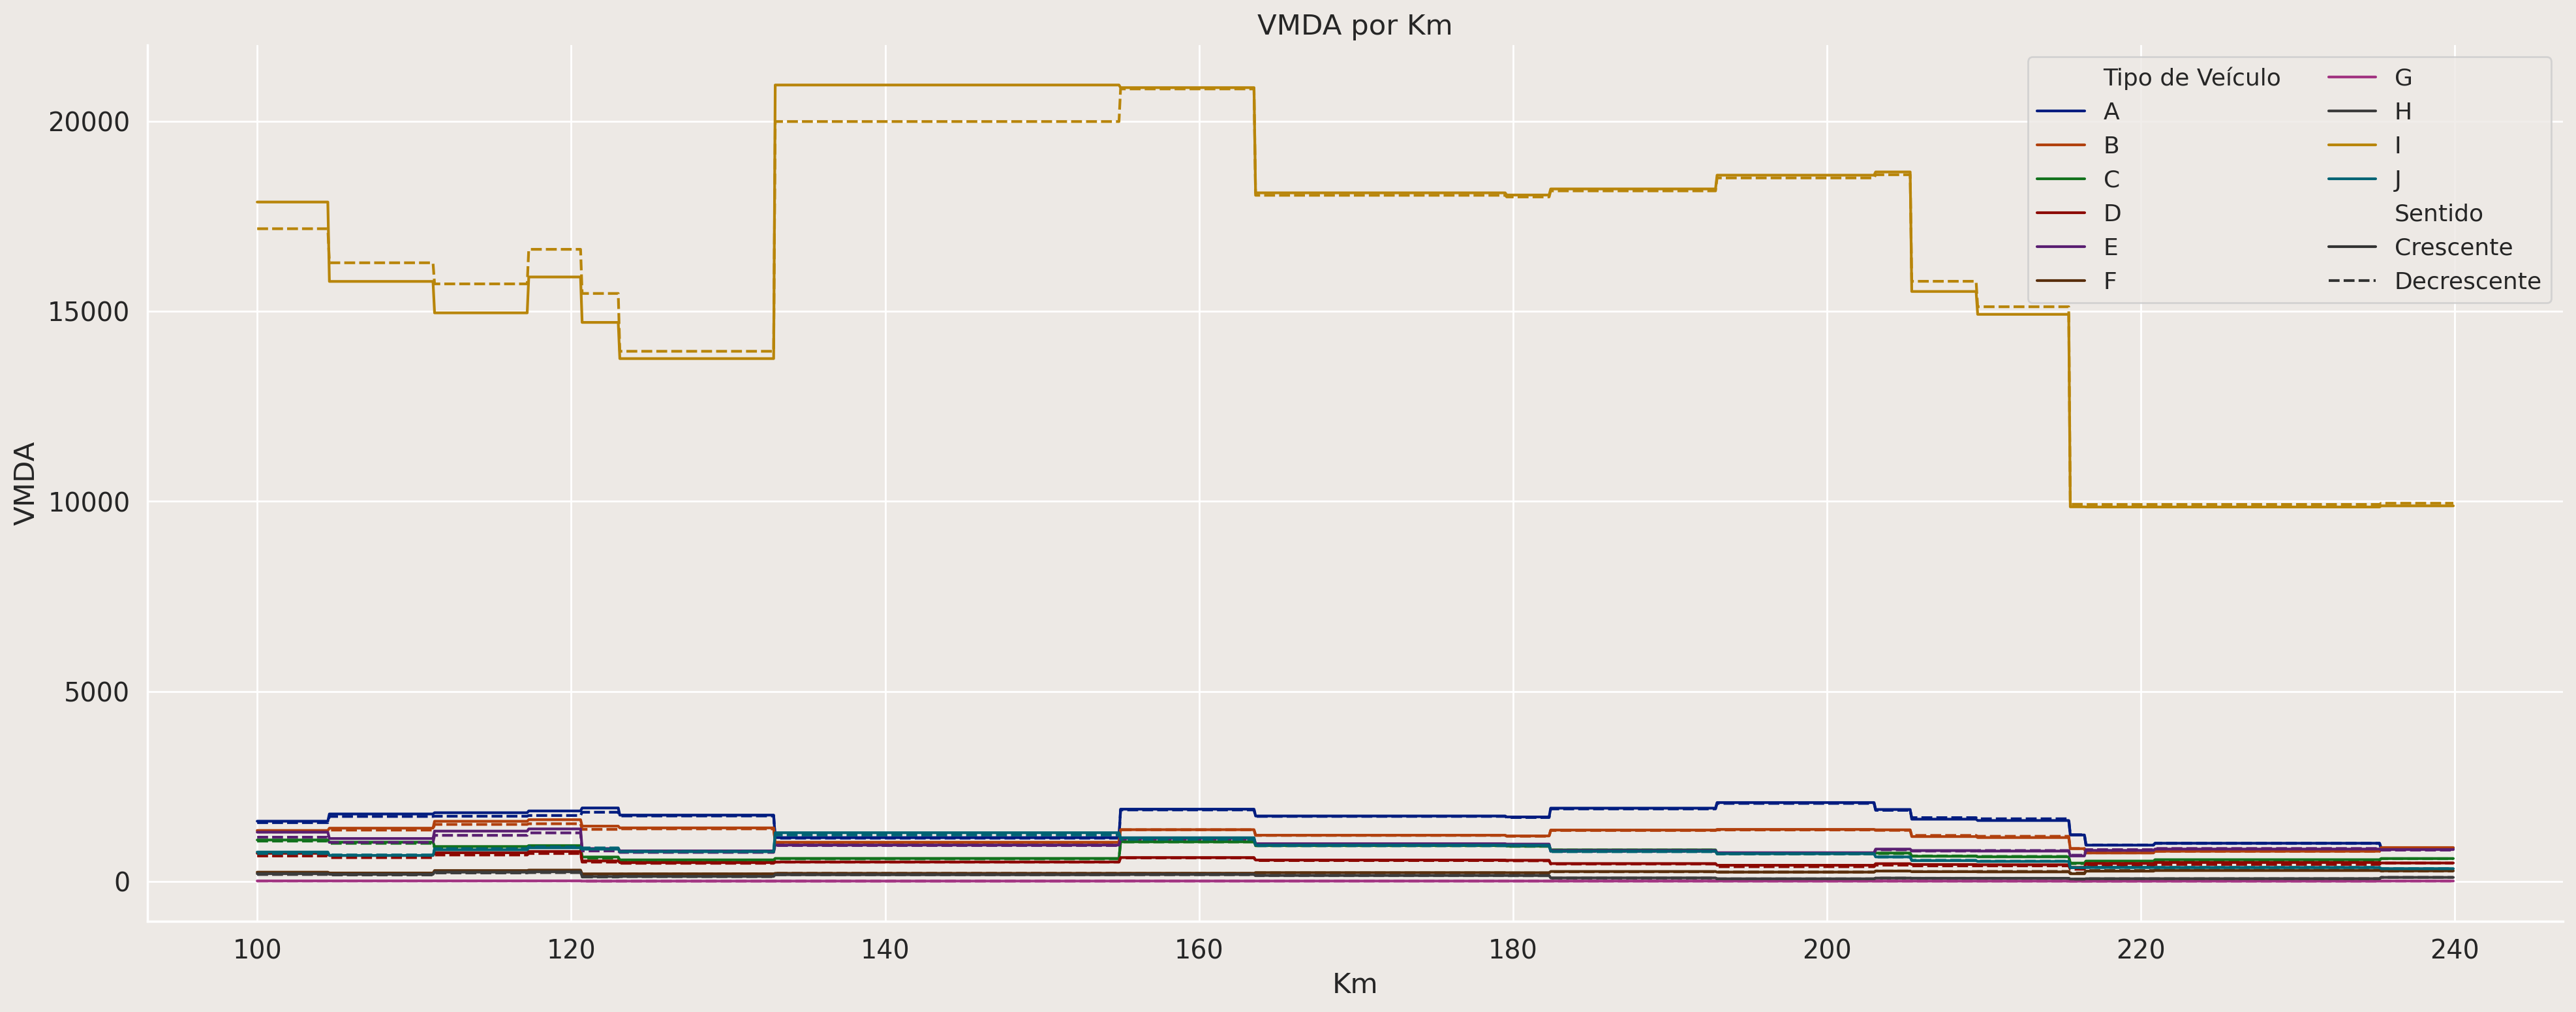

In [43]:
traf_cols = ['A','B','C','D','E','F','G','H','I','J'] 

# Agrupa por hora e sentido, somando os veículos
df_agrupado = df_vdma_expandido.groupby(['km', 'Sentido'])[traf_cols].mean().reset_index()
    
# Transforma em formato "long" para facilitar o uso do seaborn
df_melted = df_agrupado.melt(
    id_vars=['km', 'Sentido'],
    value_vars=traf_cols,
    var_name='Tipo de Veículo',
    value_name='Média'
)
    
# Cria o gráfico
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_melted, x='km', y='Média', hue='Tipo de Veículo', style='Sentido')

plt.title('VMDA por Km')
plt.xlabel('Km')
plt.ylabel('VMDA')
plt.legend(ncol=2, fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.savefig(f"distribuicao_km.png")
plt.show()

In [46]:
df_vdma_expandido['km'] = df_vdma_expandido['km'].round(1)
df_completo['km'] = df_completo['km'].round(1)

mapeamento = {col: col[1] for col in col_trafego}

df_completo.rename(columns=mapeamento, inplace=True)

df_completo.loc[:, 'Sentido'] = (
    df_completo['Sentido']
    .str.strip()
    .map({'C': 'Crescente', 'D': 'Decrescente'})
)

In [48]:
traf_cols = ['A','B','C','D','E','F','G','H','I','J']  # colunas de tráfego
df_completo['datetime'] = pd.to_datetime(df_completo['datetime'])

df_completo['data'] = df_completo['datetime'].dt.date     
df_completo['ano']  = df_completo['datetime'].dt.year     

diario = (
    df_completo
    .groupby(['ano', 'data', 'km', 'Sentido'])[traf_cols]
    .sum()                      # soma as 24 horas do dia
    .reset_index()
)

vmda = (
    diario
    .groupby(['ano', 'km', 'Sentido'])[traf_cols]
    .mean()                     # média dos dias do ano
    .reset_index()
    .sort_values(['ano','km','Sentido'])
)

df_completo = df_completo.merge(vmda, on=['km', 'Sentido', 'ano'], how='left', suffixes=('', '_VMDA_INTER'))
df_com_traffic = df_completo.merge(df_vdma_expandido, on=['km', 'Sentido', 'ano'], how='left', suffixes=('', '_VMDA'))

for col in traf_cols:
    df_com_traffic[f'{col}_factor'] = df_com_traffic[f'{col}_VMDA'] / (df_com_traffic[f'{col}_VMDA_INTER'] + 1)
    df_com_traffic[col] = (df_com_traffic[col] + 1) * df_com_traffic[f'{col}_factor']

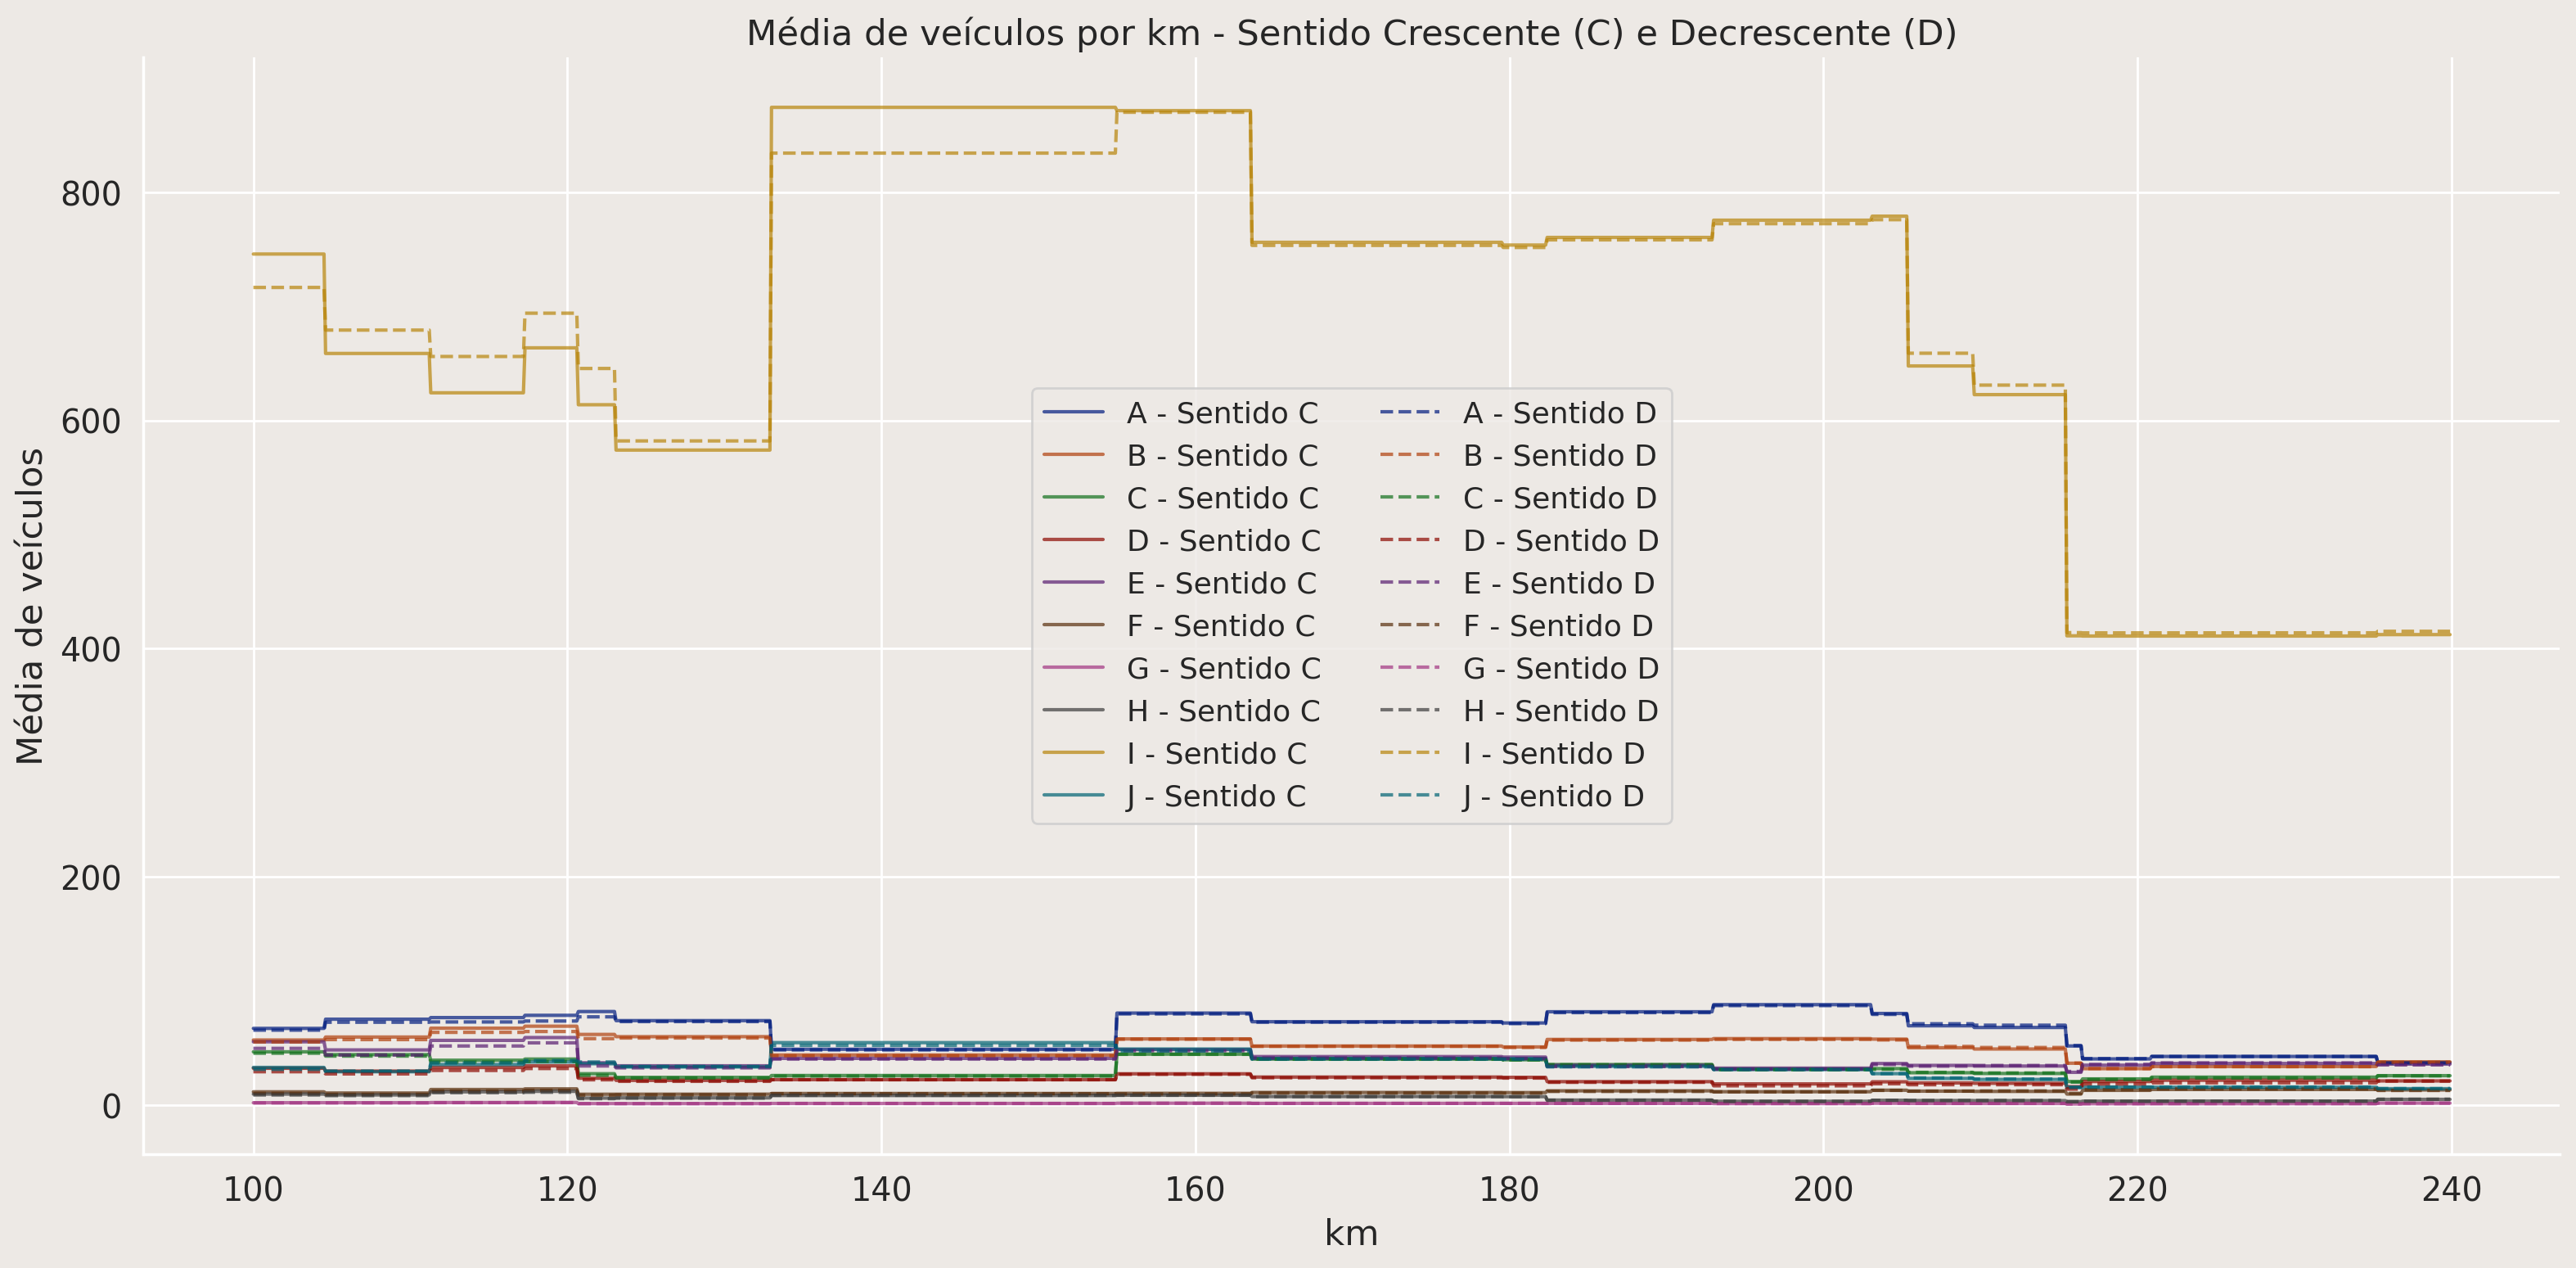

In [49]:
# Garantir que 'datetime' é datetime
df_com_traffic['datetime'] = pd.to_datetime(df_com_traffic['datetime'])

# Agrupar por dia e sentido, e calcular a média dos kms
df_diario = df_com_traffic.groupby(['km', 'Sentido'])[traf_cols].mean().reset_index()

# Separar por sentido
df_c = df_diario[df_diario['Sentido'] == 'Crescente']
df_d = df_diario[df_diario['Sentido'] == 'Decrescente']

plt.figure(figsize=(16, 8))

# Plotar cada tipo de veículo para o sentido C
for col in traf_cols:
    plt.plot(df_c['km'], df_c[col], label=f'{col} - Sentido C', alpha=0.7)

# Plotar cada tipo de veículo para o sentido D (tracejado)
for col in traf_cols:
    plt.plot(df_d['km'], df_d[col], linestyle='--', label=f'{col} - Sentido D', alpha=0.7)

plt.title('Média de veículos por km - Sentido Crescente (C) e Decrescente (D)')
plt.xlabel('km')
plt.ylabel('Média de veículos')
plt.legend(ncol=2, fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
df_com_traffic[['datetime', 'km', 'Sentido', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H','I', 'J']].to_parquet('trafic.parquet')